# Simulación de la distribución lateral

- Simula el número de partículas en tres detectores a distintas distancias del eje de la lluvia.
- Ajsuta los datos. 
- Compara los modelos con: 1) los parámetros verdaderos y 2) los estimadores

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

If likefit is not available install it with: pip -m install likefit

In [2]:
import likefit

Semilla random para reproducir los resultados

In [3]:
rng = np.random.seed(seed=60870)

Parámetros *verdaderos*

In [4]:
S0 = 19.1
beta = 2.1
par_true = np.array([S0, beta])

In [5]:
distance = np.array([191, 263, 309])  # distancia en metros

In [6]:
# Fit model
def fit_model(x, par):
    x0 = 250  # Reference distance in metres
    return par[0] * np.power(x/x0, -par[1])

## Simulación de un evento

Media del número de eventos en cada detector

In [7]:
mu = fit_model(distance, par_true)
mu

array([33.61532498, 17.17118683, 12.24037093])

Número de partículas en cada detector

In [8]:
particles = poisson.rvs(mu, random_state=rng)
particles

array([27, 16, 19])

## Ajuste de la función de distribución lateral

In [9]:
fitter = likefit.Poisson(distance, particles, fit_model)
fitter.fit(seed=par_true)
fitter.print_results()

Estimators: [20.28608815  0.90298485]
Errors: [2.61172668 0.61734424]
Covariance matrix: [[ 6.82111627 -0.32557728]
 [-0.32557728  0.38111391]]
Correlation matrix: [[ 1.         -0.20192913]
 [-0.20192913  1.        ]]
Deviance: 0.9639782301116235
Degrees of freedom: 1
Pvalue: 0.32618659670304434


## Plot del ajuste

In [10]:
xfit = np.linspace(150, 400, 256)

Modelo verdadero

In [11]:
mu_true = fit_model(xfit, par_true)

Modelo ajustado

In [12]:
estimators = fitter.get_estimators()
mu_fit = fit_model(xfit, estimators)

Errores del ajuste

In [13]:
fit_error = fitter.get_yfit_error(xfit)

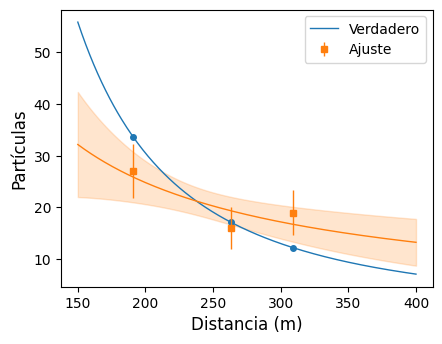

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Partículas')

# True
ax.plot(xfit, mu_true, color='tab:blue', label="Verdadero")
ax.plot(distance, mu, ls='none', marker='o', color='tab:blue')

# Fit
yerrors = np.sqrt(particles)
ax.errorbar(distance, particles, yerrors, ls='none', marker='s', color='tab:orange', label="Ajuste")
ax.plot(xfit, mu_fit, color='tab:orange')
ax.fill_between(xfit, mu_fit - fit_error, mu_fit + fit_error, color='tab:orange', alpha=0.2)

ax.legend()
plt.show()